In [2]:
# Stocks price predection
# Import modules

import yfinance as yf
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

In [4]:
# Import ARIMA

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

### Get data

In [718]:
# Dataset 1: Barclays

ticker = "BARC.L"

data1 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data1.to_csv("barclays_data.csv")

[*********************100%***********************]  1 of 1 completed


In [125]:
# Dataset 2: Shell

ticker = "SHEL.L"

data2 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data2.to_csv("shell_data.csv")

[*********************100%***********************]  1 of 1 completed


In [6]:
# Dataset 3: Haleon

ticker = "HLN.L"

data3 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data3.to_csv("haleon_data.csv")

[*********************100%***********************]  1 of 1 completed


In [7]:
# Dataset 4: Rightmove

ticker = "RMV.L"

data4 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data4.to_csv("rightmove_data.csv")

[*********************100%***********************]  1 of 1 completed


In [8]:
# Dataset 5: Experian

ticker = "EXPN.L"

data5 = yf.download(ticker , start="2015-01-01", end="2025-01-01", auto_adjust=False)

data5.to_csv("experian_data.csv")

[*********************100%***********************]  1 of 1 completed


### Preprocessing

In [719]:
data1.shape

(2526, 6)

In [10]:
data1.isnull().sum()

Price      Ticker
Adj Close  BARC.L    0
Close      BARC.L    0
High       BARC.L    0
Low        BARC.L    0
Open       BARC.L    0
Volume     BARC.L    0
dtype: int64

In [11]:
data1

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BARC.L,BARC.L,BARC.L,BARC.L,BARC.L,BARC.L
Date,,,,,,
2015-01-02,242.416000,243.149994,245.600006,241.550003,242.199997,20219711
2015-01-05,233.991470,234.699997,243.149994,234.199997,242.300003,39050852
2015-01-06,229.654617,230.350006,235.850006,230.250000,234.050003,37573308
2015-01-07,229.903900,230.600006,233.460007,230.149994,232.100006,37219841
2015-01-08,236.334381,237.050003,238.350006,231.550003,234.300003,41082776
...,...,...,...,...,...,...
2024-12-23,261.531952,261.600006,262.049988,259.299988,261.200012,13605305
2024-12-24,263.481384,263.549988,264.181000,262.273010,262.950012,8298189


In [12]:
data1.columns = data1.columns.droplevel(1)

In [13]:
data1 = data1.reset_index()

In [14]:
data1

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02,242.416000,243.149994,245.600006,241.550003,242.199997,20219711
1,2015-01-05,233.991470,234.699997,243.149994,234.199997,242.300003,39050852
2,2015-01-06,229.654617,230.350006,235.850006,230.250000,234.050003,37573308
3,2015-01-07,229.903900,230.600006,233.460007,230.149994,232.100006,37219841
4,2015-01-08,236.334381,237.050003,238.350006,231.550003,234.300003,41082776
...,...,...,...,...,...,...,...
2521,2024-12-23,261.531952,261.600006,262.049988,259.299988,261.200012,13605305
2522,2024-12-24,263.481384,263.549988,264.181000,262.273010,262.950012,8298189
2523,2024-12-27,264.831085,264.899994,265.899994,263.540009,264.350006,15970484
2524,2024-12-30,264.681091,264.750000,265.750000,261.399994,262.600006,14724719


In [15]:
data1.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

In [16]:
data1

Price,Date,Adj Close
0,2015-01-02,242.416000
1,2015-01-05,233.991470
2,2015-01-06,229.654617
3,2015-01-07,229.903900
4,2015-01-08,236.334381
...,...,...
2521,2024-12-23,261.531952
2522,2024-12-24,263.481384
2523,2024-12-27,264.831085
2524,2024-12-30,264.681091


In [17]:
data1.describe

<bound method NDFrame.describe of Price       Date   Adj Close
0     2015-01-02  242.416000
1     2015-01-05  233.991470
2     2015-01-06  229.654617
3     2015-01-07  229.903900
4     2015-01-08  236.334381
...          ...         ...
2521  2024-12-23  261.531952
2522  2024-12-24  263.481384
2523  2024-12-27  264.831085
2524  2024-12-30  264.681091
2525  2024-12-31  268.080231

[2526 rows x 2 columns]>

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2526 non-null   datetime64[ns]
 1   Adj Close  2526 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.6 KB


Text(0, 0.5, 'Adjusted close')

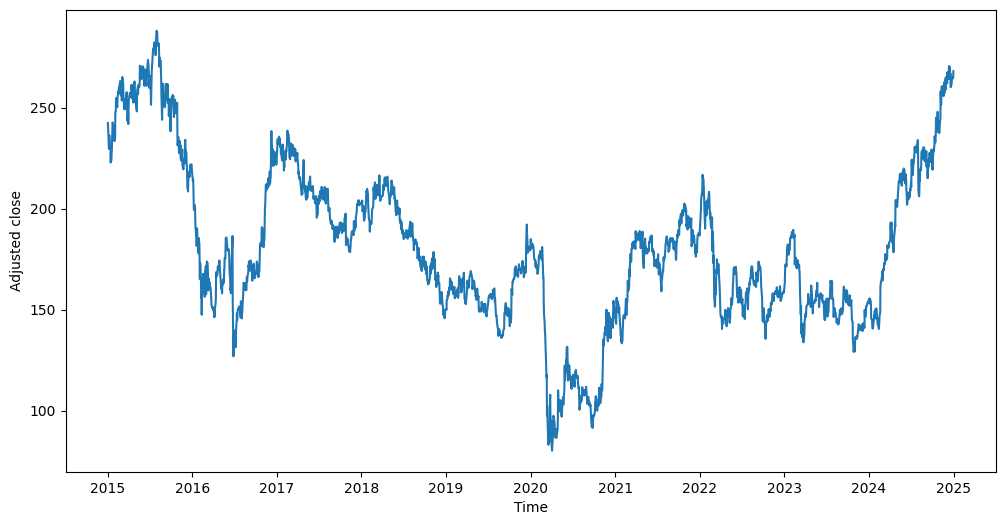

In [45]:
# Plot the data

plt.figure(figsize = (12,6))
plt.plot(data1["Date"], data1["Adj Close"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [20]:
data_ajdc = data1[["Adj Close"]].values

In [21]:
# Train Test Split
train_size = int(len(data_ajdc) * 0.8)
train_data = data_ajdc[:train_size]
test_data  = data_ajdc[train_size:]

In [22]:
train_data

array([[242.41600037],
       [233.99147034],
       [229.65461731],
       ...,
       [157.55464172],
       [158.6933136 ],
       [159.15278625]])

In [23]:
# Scale the data via RobustScaler

scaler = preprocessing.RobustScaler(with_centering= True,           # Hyperparameter
                                    with_scaling= True,             # HyperParameter
                                    quantile_range= (25.0, 75.0))    # Default
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [24]:
#X_train X_test, t_train, y_test split

def create_dataset(dataset, time_step = 1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [25]:
time_step = 60        # Hyperparameter
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [26]:
print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (1960, 60)
Test samples: (446, 60)


In [27]:
# Reshape to fit the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [28]:
print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (1960, 60, 1)
Test samples: (446, 60, 1)


# Model: LSTM (Barclays)

In [29]:
# Build the model
model = Sequential([
    Input(shape=(60, 1)),          
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.1359 - val_loss: 0.0413
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0371 - val_loss: 0.0299
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0301 - val_loss: 0.0343
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0292 - val_loss: 0.0267
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0258 - val_loss: 0.0217
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0245 - val_loss: 0.0209
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0223 - val_loss: 0.0185
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0211 - val_loss: 0.0204
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0200 - val_loss: 0.0173
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0195 - val_loss: 0.0158
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0184 - val_loss: 0.0142
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step

In [32]:
# Predict from the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [33]:
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

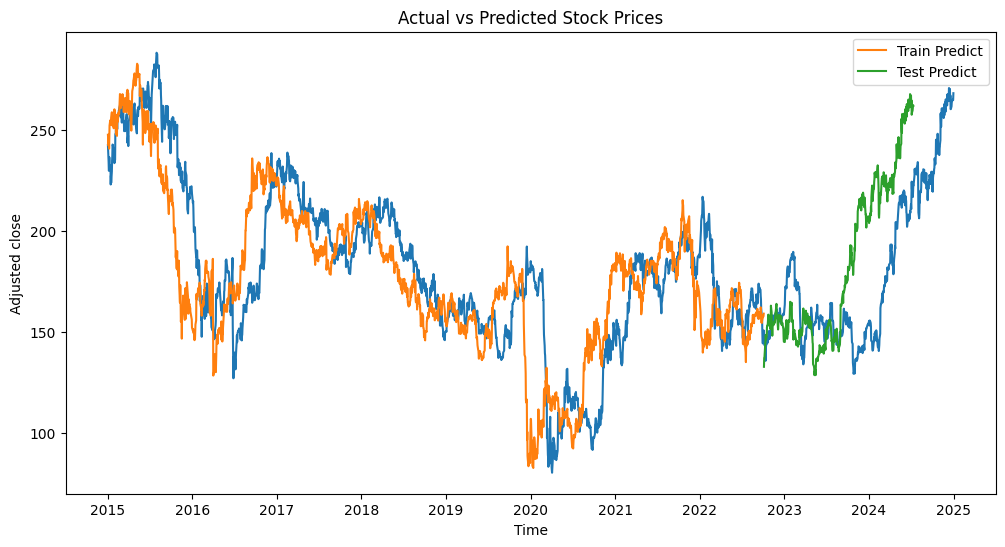

In [39]:
plt.figure(figsize = (12,6))
plt.plot(data1["Date"], data1["Adj Close"])
plt.plot(data1["Date"][:len(train_predict_inv)], train_predict_inv, label="Train Predict")
plt.plot(data1["Date"][len(train_predict_inv):len(train_predict_inv)+len(test_predict_inv)], 
         test_predict_inv, label="Test Predict")
plt.xlabel("Time")
plt.ylabel("Adjusted close")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()

# Teseting on ARIMA

In [630]:
# Dataset 2: Shell

data2 = pd.read_csv("shell_data.csv", header=[0,1,2])

In [631]:
data2

,Price,Adj Close,Close,High,Low,Open,Volume
,Ticker,SHEL.L,SHEL.L,SHEL.L,SHEL.L,SHEL.L,SHEL.L
,Date,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2,Unnamed: 6_level_2
0,2015-01-02,2155.649902,2168.0,2176.500000,2125.0,2173.5,3251273
1,2015-01-05,2068.151855,2080.0,2161.000000,2076.0,2157.5,8741887
2,2015-01-06,2067.654541,2079.5,2123.500000,2033.0,2080.0,7476529
3,2015-01-07,2086.049561,2098.0,2128.000000,2055.5,2087.5,6579382
4,2015-01-08,2130.295654,2142.5,2150.500000,2112.0,2134.5,4549799
...,...,...,...,...,...,...,...
2521,2024-12-23,2407.962646,2409.0,2410.000000,2387.0,2396.0,6564724
2522,2024-12-24,2427.953857,2429.0,2437.219971,2419.0,2419.5,3634589


In [632]:
data2.columns = data2.columns.droplevel([1,2])
data2 = data2.rename(columns={'Price': 'Date'})
data2['Date'] = pd.to_datetime(data2['Date'])
data2.set_index('Date', inplace=True)

In [633]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2526 entries, 2015-01-02 to 2024-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2526 non-null   float64
 1   Close      2526 non-null   float64
 2   High       2526 non-null   float64
 3   Low        2526 non-null   float64
 4   Open       2526 non-null   float64
 5   Volume     2526 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.1 KB


In [634]:
result = adfuller(data2['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.7105533333741068
p-value: 0.42568344880166314


In [635]:
data_diff = data2['Adj Close'].diff().dropna()

In [636]:
adfuller(data_diff)

(np.float64(-37.120024674844764),
 0.0,
 1,
 2523,
 {'1%': np.float64(-3.432944516713937),
  '5%': np.float64(-2.8626862482960957),
  '10%': np.float64(-2.567380191580307)},
 np.float64(24616.253088644124))

In [637]:
data2.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

In [638]:
data2

,Adj Close
Date,
2015-01-02,2155.649902
2015-01-05,2068.151855
2015-01-06,2067.654541
2015-01-07,2086.049561
2015-01-08,2130.295654
...,...
2024-12-23,2407.962646
2024-12-24,2427.953857
2024-12-27,2439.448975


Text(0, 0.5, 'Adjusted close')

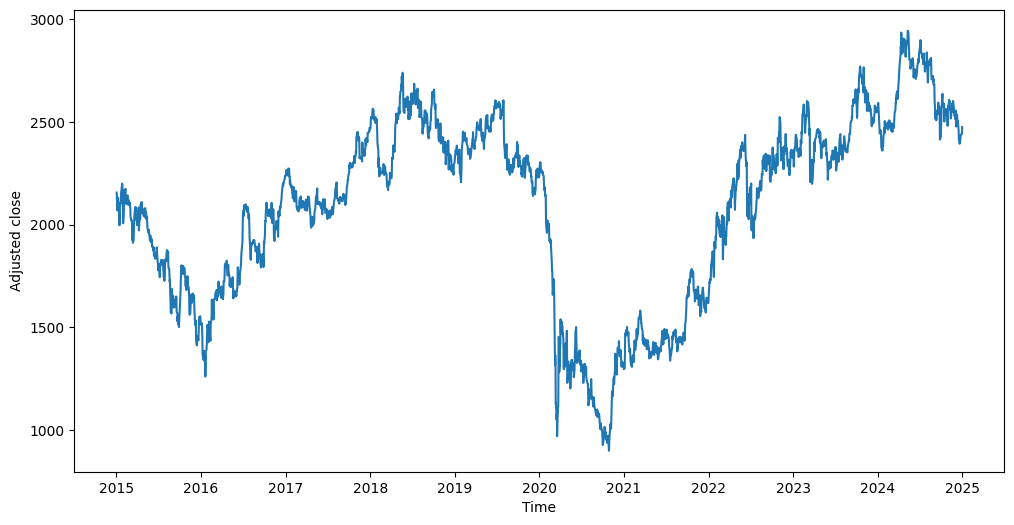

In [639]:
# Plot the data

plt.figure(figsize = (12,6))
plt.plot(data2.index, data2["Adj Close"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [640]:
data2["log"] = np.log(data2["Adj Close"])

Text(0, 0.5, 'Adjusted close')

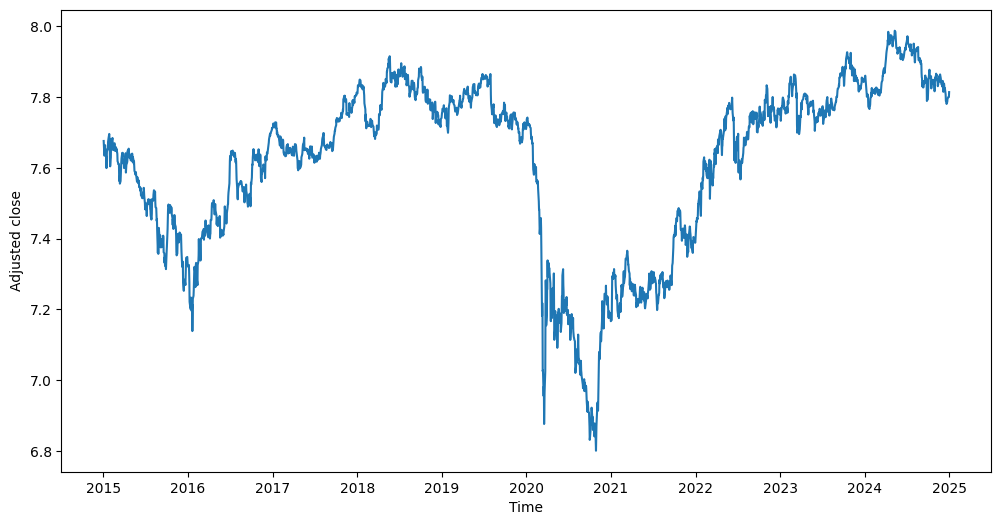

In [641]:
plt.figure(figsize = (12,6))
plt.plot(data2.index, data2["log"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [642]:
data2["diff"] = data2["Adj Close"].diff()
data2 = data2.replace([np.inf, -np.inf], np.nan).dropna(subset=["diff"])

Text(0, 0.5, 'Adjusted close')

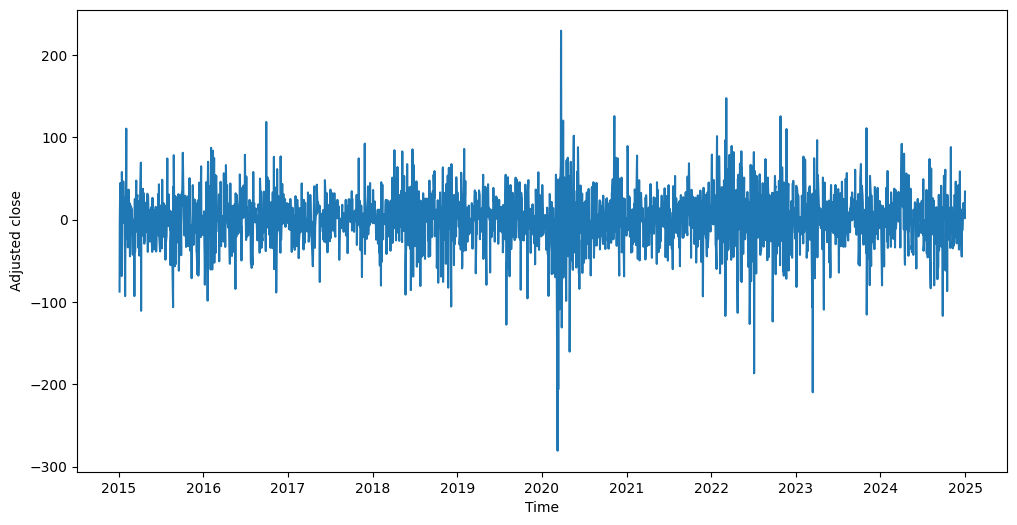

In [643]:
plt.figure(figsize = (12,6))
plt.plot(data2.index, data2["diff"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [644]:
data2

,Adj Close,log,diff
Date,,,
2015-01-05,2068.151855,7.634411,-87.498047
2015-01-06,2067.654541,7.634170,-0.497314
2015-01-07,2086.049561,7.643027,18.395020
2015-01-08,2130.295654,7.664016,44.246094
2015-01-09,2094.499756,7.647070,-35.795898
...,...,...,...
2024-12-23,2407.962646,7.786536,14.493896
2024-12-24,2427.953857,7.794804,19.991211
2024-12-27,2439.448975,7.799527,11.495117


In [645]:
#from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data2["diff"])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -37.120024674844764
p-value: 0.0


In [646]:
data_ajdc = data2[["Adj Close"]]

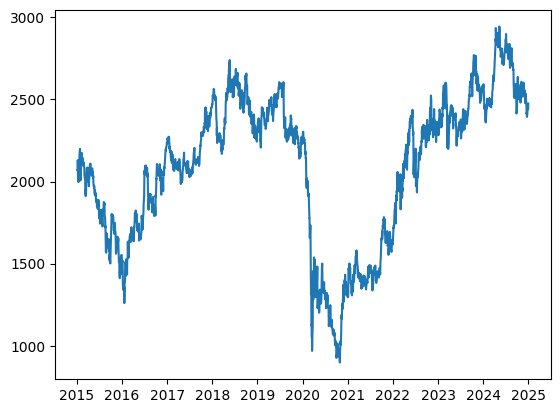

In [661]:
plt.plot(data_ajdc)

In [648]:
train_size = int(len(data_ajdc) * 0.7)
train_data = data_ajdc.iloc[:train_size]
test_data  = data_ajdc.iloc[train_size:]

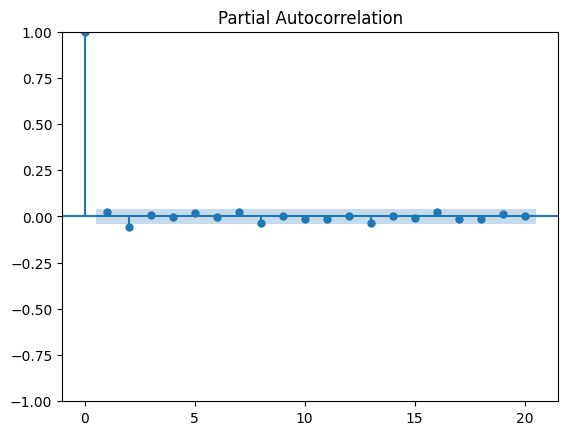

In [649]:
plot_pacf(data2["diff"], lags=20)
plt.show()

In [650]:
type(train_data)

pandas.core.frame.DataFrame

In [651]:
print(len(train_data), len(test_data))


1767 758


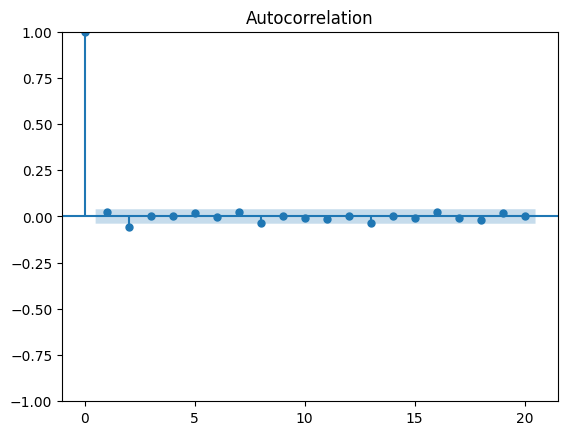

In [652]:
plot_acf(data2["diff"], lags=20)
plt.show()

In [653]:
type(train_data)

pandas.core.frame.DataFrame

In [654]:
# Set Frequency

#train_data.index.freq = 'D'

train_data = train_data.asfreq('D').interpolate()

In [655]:
train_data

,Adj Close
Date,
2015-01-05,2068.151855
2015-01-06,2067.654541
2015-01-07,2086.049561
2015-01-08,2130.295654
2015-01-09,2094.499756
...,...
2021-12-20,1571.099976
2021-12-21,1616.028564
2021-12-22,1625.413330


In [693]:
#from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(2, 1, 1))    # hyperparameter
model_fit = model.fit()

In [694]:
train_pred = model_fit.predict(start = train_data.index[0], end = train_data.index[-1])

In [695]:
forecast_obj = model_fit.get_forecast(steps=len(test_data))
test_pred = forecast_obj.predicted_mean

In [696]:
test_pred.index = test_data.index

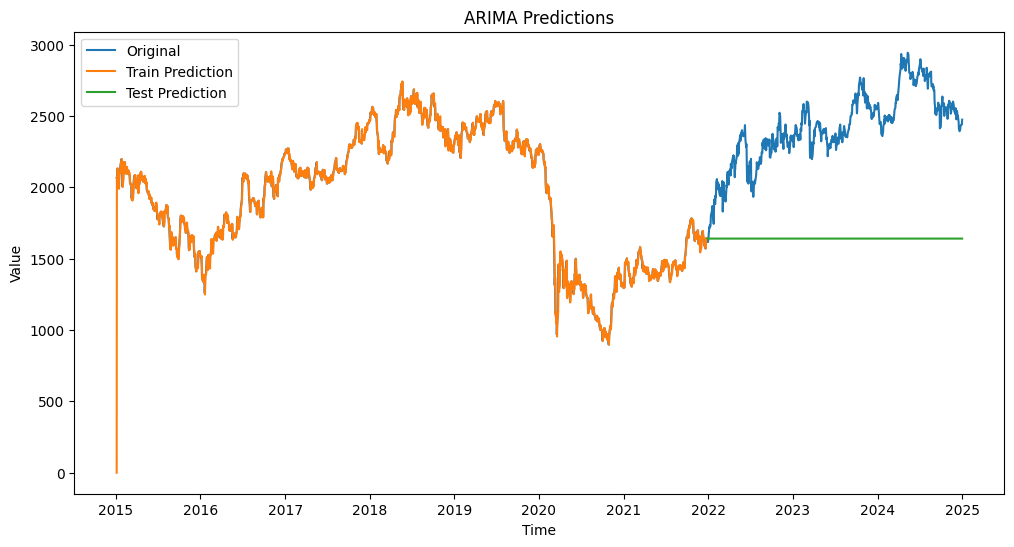

In [698]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data_ajdc, label='Original')
plt.plot(train_pred, label='Train Prediction')
plt.plot(test_data.index, test_pred, label='Test Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Predictions')
plt.show()


# Model: LSTM (Shell)

In [703]:
# Dataset 2: Shell

data2 = pd.read_csv("shell_data.csv", header=[0,1,2])

In [704]:
data2.columns = data2.columns.droplevel([1,2])
data2 = data2.rename(columns={'Price': 'Date'})
data2['Date'] = pd.to_datetime(data2['Date'])

In [705]:
data2

,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02,2155.649902,2168.0,2176.500000,2125.0,2173.5,3251273
1,2015-01-05,2068.151855,2080.0,2161.000000,2076.0,2157.5,8741887
2,2015-01-06,2067.654541,2079.5,2123.500000,2033.0,2080.0,7476529
3,2015-01-07,2086.049561,2098.0,2128.000000,2055.5,2087.5,6579382
4,2015-01-08,2130.295654,2142.5,2150.500000,2112.0,2134.5,4549799
...,...,...,...,...,...,...,...
2521,2024-12-23,2407.962646,2409.0,2410.000000,2387.0,2396.0,6564724
2522,2024-12-24,2427.953857,2429.0,2437.219971,2419.0,2419.5,3634589
2523,2024-12-27,2439.448975,2440.5,2448.500000,2421.5,2425.0,5924098
2524,2024-12-30,2440.948486,2442.0,2449.139893,2426.0,2429.0,5181790


In [706]:
data2.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

Text(0, 0.5, 'Adjusted close')

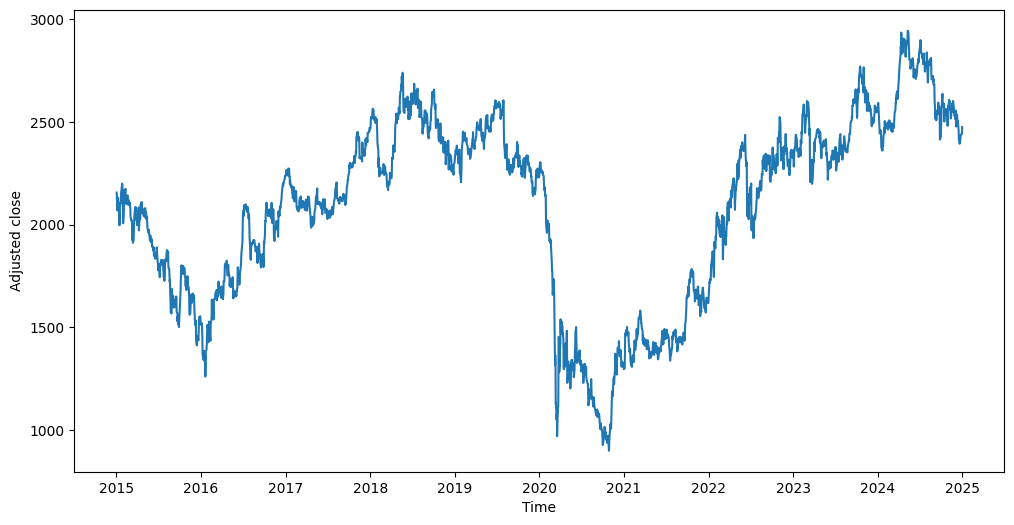

In [710]:
# Plot the data

plt.figure(figsize = (12,6))
plt.plot(data2["Date"], data2["Adj Close"])
plt.xlabel("Time")
plt.ylabel("Adjusted close")

In [712]:
data_ajdc = data2[["Adj Close"]].values

In [713]:
# Train Test Split
train_size = int(len(data_ajdc) * 0.8)
train_data = data_ajdc[:train_size]
test_data  = data_ajdc[train_size:]

In [714]:
# Scale the data via RobustScaler

scaler = preprocessing.RobustScaler(with_centering= True,           # Hyperparameter
                                    with_scaling= True,             # HyperParameter
                                    quantile_range= (25.0, 75.0))    # Default
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [715]:
#X_train X_test, t_train, y_test split

def create_dataset(dataset, time_step = 1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [716]:
time_step = 60        # Hyperparameter
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [717]:
print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (1960, 60)
Test samples: (446, 60)


In [721]:
# Reshape to fit the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [722]:
print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)

Train samples: (1960, 60, 1)
Test samples: (446, 60, 1)


In [723]:
# Build the model
model = Sequential([
    Input(shape=(60, 1)),          
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

In [724]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [725]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0966 - val_loss: 0.0297
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0205 - val_loss: 0.0290
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0169 - val_loss: 0.0135
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0143 - val_loss: 0.0133
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0132 - val_loss: 0.0106
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0113 - val_loss: 0.0113
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0100 - val_loss: 0.0116
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0092 - val_loss: 0.0114
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0086 - val_loss: 0.0089
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0081 - val_loss: 0.0082
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step

In [726]:
# Predict from the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [727]:
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

In [728]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.049971508501075644

In [729]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.051024623724332266

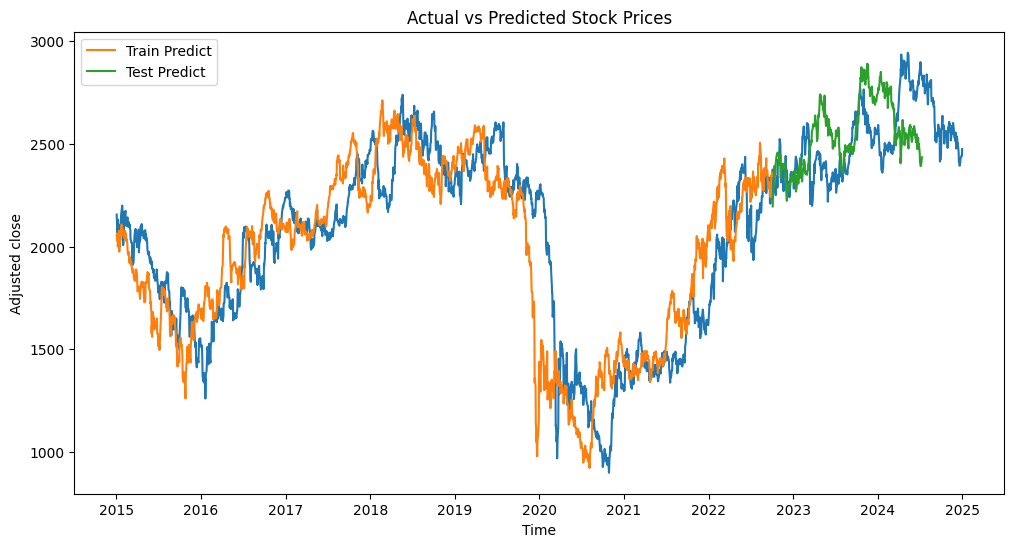

In [730]:
plt.figure(figsize = (12,6))
plt.plot(data2["Date"], data2["Adj Close"])
plt.plot(data2["Date"][:len(train_predict_inv)], train_predict_inv, label="Train Predict")
plt.plot(data2["Date"][len(train_predict_inv):len(train_predict_inv)+len(test_predict_inv)], 
         test_predict_inv, label="Test Predict")
plt.xlabel("Time")
plt.ylabel("Adjusted close")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()

# Model: LSTM (Haleon)

In [740]:
# Dataset 3: Shell

data3 = pd.read_csv("haleon_data.csv", header=[0,1,2])

# Process the data
data3.columns = data3.columns.droplevel([1,2])
data3 = data3.rename(columns={'Price': 'Date'})
data3['Date'] = pd.to_datetime(data3['Date'])

# Drop other columns
data3.drop(["Close", "High", "Low", "Open", "Volume"], axis = 1, inplace = True)

# Get the desired column that adjusted close
data_ajdc = data3[["Adj Close"]].values

# Train Test Split
train_size = int(len(data_ajdc) * 0.8)
train_data = data_ajdc[:train_size]
test_data  = data_ajdc[train_size:]

# Scale the data via RobustScaler

scaler = preprocessing.RobustScaler(with_centering= True,           # Hyperparameter
                                    with_scaling= True,             # HyperParameter
                                    quantile_range= (25.0, 75.0))    # Default
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

#X_train X_test, t_train, y_test split

def create_dataset(dataset, time_step = 1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60        # Hyperparameter
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape to fit the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the model
model = Sequential([
    Input(shape=(60, 1)),          
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam")

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [741]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.7290 - val_loss: 6.9629
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4675 - val_loss: 6.4821
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3514 - val_loss: 7.1156
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2894 - val_loss: 6.8087
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2504 - val_loss: 7.0614
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2314 - val_loss: 6.3993
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2155 - val_loss: 6.5176
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2104 - val_loss: 5.5438
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2009 - val_loss: 4.3852
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1946 - val_loss: 4.0174
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1877 - val_loss: 3.2272
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1835 - val_l

In [743]:
# Predict from the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse the scaled results
train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

# Get mean squared error of train and test
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0.2195987669149673
1.9993520528144761


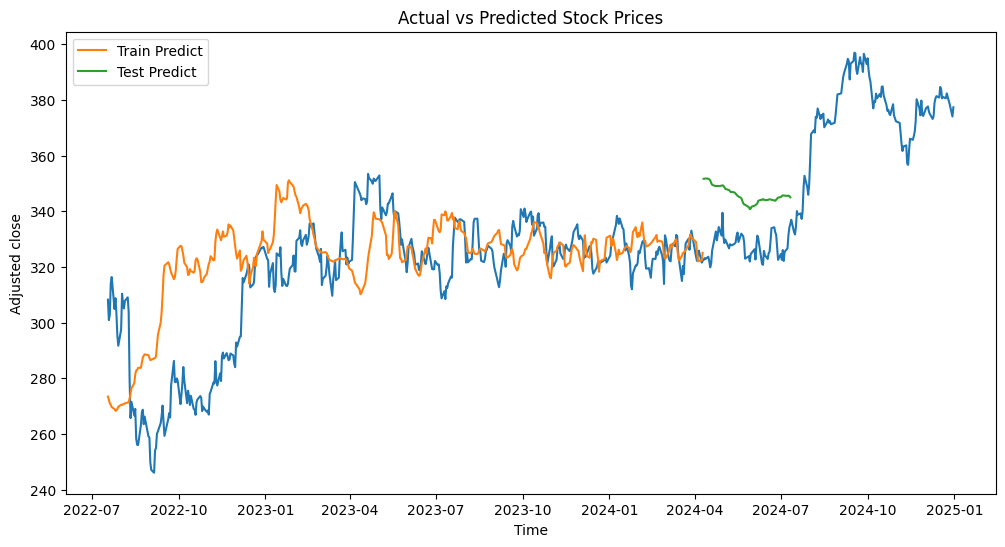

In [745]:
# Plot the output

plt.figure(figsize = (12,6))
plt.plot(data3["Date"], data3["Adj Close"])
plt.plot(data3["Date"][:len(train_predict_inv)], train_predict_inv, label="Train Predict")
plt.plot(data3["Date"][len(train_predict_inv):len(train_predict_inv)+len(test_predict_inv)], 
         test_predict_inv, label="Test Predict")
plt.xlabel("Time")
plt.ylabel("Adjusted close")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()